In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## 1.Dataset Prepration

In [2]:
#Load the sklearn MNIST Dataset
digits = load_digits()

In [3]:
X = digits.data
Y = digits.target

In [4]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


0


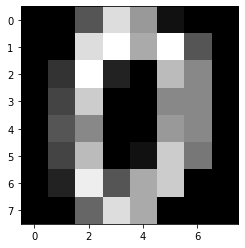

In [5]:
plt.imshow(X[0].reshape((8,8)),cmap='gray')
print(Y[0])
plt.show()

In [6]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


## Train Models 

In [7]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [8]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [9]:
#Train
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446


In [11]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8103537583567821

In [12]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8819396216300838

### Constructing and Visualising Confusion Matrix
also shown in naive bayes mnist dataset for better understanding

In [17]:
classes_labels = np.arange(10)

In [15]:
from sklearn.metrics import confusion_matrix

Y_mnb = mnb.predict(X)
cnf_matrix = confusion_matrix(Y,Y_mnb)
print(cnf_matrix)

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


**Note-** Diagonal Entries represets No of entries where Predicted Class = Actual Class

In [16]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

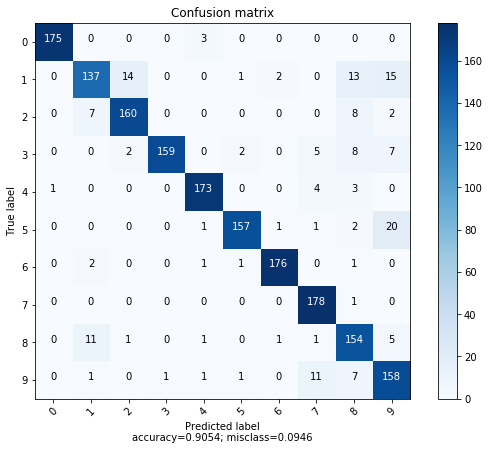

In [20]:
plot_confusion_matrix(cnf_matrix,classes_labels,normalize=False,title="Confusion matrix",cmap = plt.cm.Blues)